In [1]:
library(ggplot2)

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


## Exercise 1
The triangular distribution, in the interval (a, b), is given by the following:
$$
f (X) =\left\{
\begin{array}{ll}
\frac{2(x-a)}{(b-a)(c-a)}& a\leq x<c \\
\frac{2(b-x)}{(b-a)(b-c)}& c\leq x<b \\
0                        &\text{otherwise}
\end{array}
\right.
$$

where $ c \in \left[ a, b \right]$.

a) plot the function, given the interval (a, b)

b) and write an algorithm to generate random numbers from the triangular distribution

c) generate $10^4$ random number from the distribution, show them in an histogram and superimpose the analytical curve

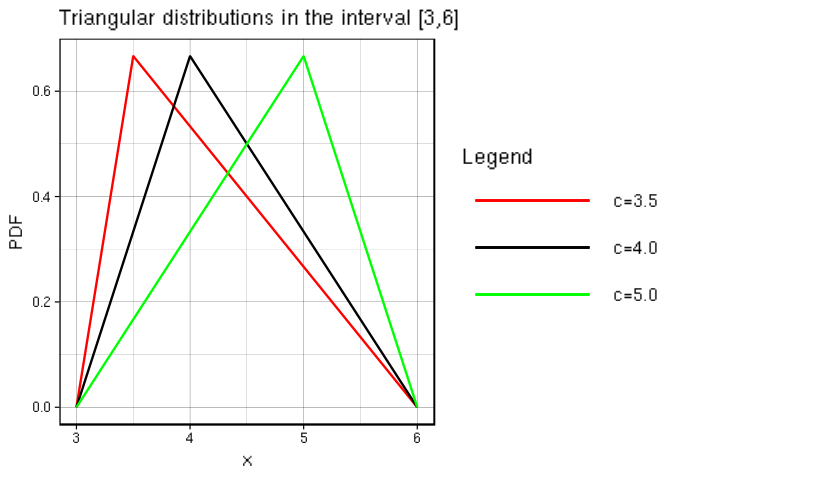

In [2]:
options(repr.plot.width=7, repr.plot.height=4) 
a=3
b=6
c=4

step=(b-a)/1000


f_x <- function(x, a=a, b=b, c=c){
    return (
            ifelse( a<=x & x<c, 2*(x-a)/((b-a)*(c-a)),
            
                ifelse( c<=x & x<b , 2*(b-x)/((b-a)*(b-c)), 0)))
}


interval <- seq(a,b,step)

df3h <- data.frame(x=interval, y = f_x(interval, a, b,3.5))
df4 <- data.frame(x=interval, y = f_x(interval, a, b,4))
df5 <- data.frame(x=interval, y = f_x(interval, a, b,5))



p1 <- ggplot()+ geom_line(data=df3h, aes(x=x, y=y,colour="c=3.5"))+
                 geom_line(data=df4,aes( x=x, y=y, colour="c=4.0"))+
                 geom_line(data=df5, aes(x=x, y=y,  colour="c=5.0"))+
                 scale_color_manual(name = "Legend", values = c("c=3.5" = "red", "c=4.0" = "black","c=5.0"="green"))+


                labs(title = "Triangular distributions in the interval [3,6]",
                        x = "x",
                        y = "PDF")+
                theme_linedraw()+                    
                theme(text = element_text(size=10),
                     legend.key.size = unit(1, 'cm'), #change legend key size
                            legend.key.height = unit(1, 'cm'), #change legend key height
                            legend.key.width = unit(3, 'cm'), #change legend key width
                            legend.title = element_text(size=12), #change legend title font size
                            legend.text = element_text(size=10))


p1

b) Write an algorithm to generate random numbers from the triangular distribution

c) generate 104 random number from the distribution, show them in an histogram and superimpose the analytical curve

### Solution:
I can use the Acceptance-Rejection Method: generate one number `x` between a and b, generate a second random number `y` between 0 and the maximum of the PDF (which is taken in x=c), and finally accept the first generated number `x` only if `y`<f(`x`).

Notice that in principle we could do this using a while cycle, however we can exploit the built-in atomic vectors of R in order to reduce time of computation, avoiding a much slower while cycle.

Another alternative will be of course the possibility to compute the CDF (will be a $2^{nd}$ order polynomial) and use the inverse transform method

max	 0.6666667 
length	 40000 


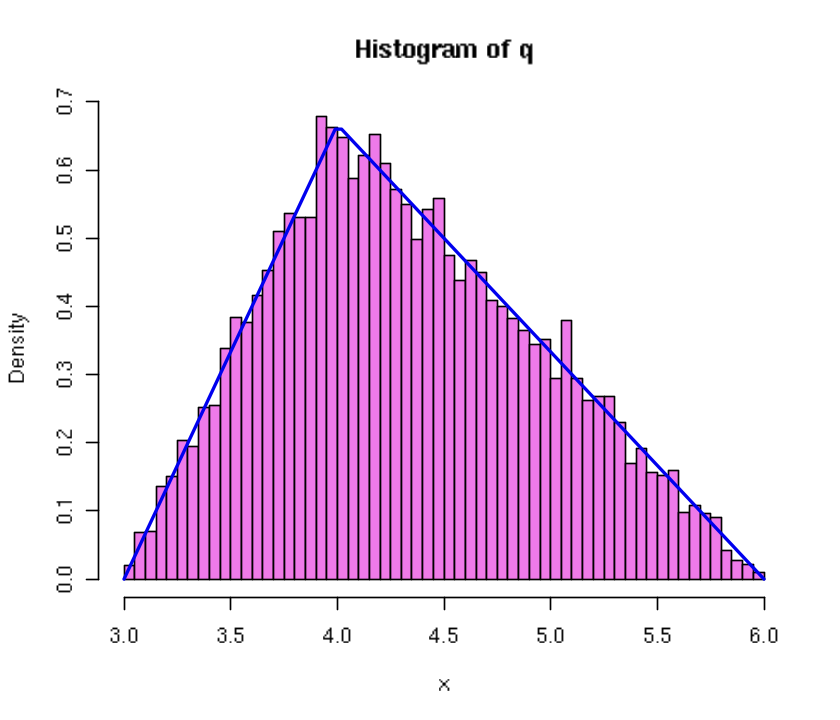

In [3]:
set.seed(14903)
options(repr.plot.width=7, repr.plot.height=6)
a=3
b=6
c=4

N=10^4                                                   #numbers of desired
g=0                                                      #numbers of wanted
cat("max\t",f_x(x=c,a,b,c),"\n")
q=runif(4*N, min=a, max=b)                              #we generate much more than 10^4
y=runif(n=4*N, min=0, max=f_x(x=c,a,b,c))               

cat("length\t", length(q),"\n")
q <- q[y < f_x(x=q,a,b,c)]                               #we take only the one that satisfy
q <- q[1:N]                                              #finally we take only the first N
hist(q,
     breaks=50,
     col="orchid2",
     freq=FALSE,
     xlab="x"
    )

curve( 
     f_x(x,a=a, b=b, c=c), from=3, to=6, 
     type="l",
     col="blue2",
     ylab=" ",
     lwd=2,
     add=TRUE
     )


## Exercise 2 - Markov’s inequality
Markov’s inequality represents an upper bound to probability distributions:
$$P(X \geq k) \leq \frac{E\left[X\right]}{k} $$

for k > 0

Having defined a function
$$G(k) = 1 − F(k) \equiv P(X \geq k)$$
Plot G(k) and the Markov’s upper bound for

a) the exponential, Exp(λ = 1), distribution function

b) the uniform, U (3, 5), distribution function

c) the binomial, Bin(n = 1, p = 1/2), distribution function

d) a Poisson, Pois(λ = 1/2), distribution function

prob che X>k è 1- cumulativa

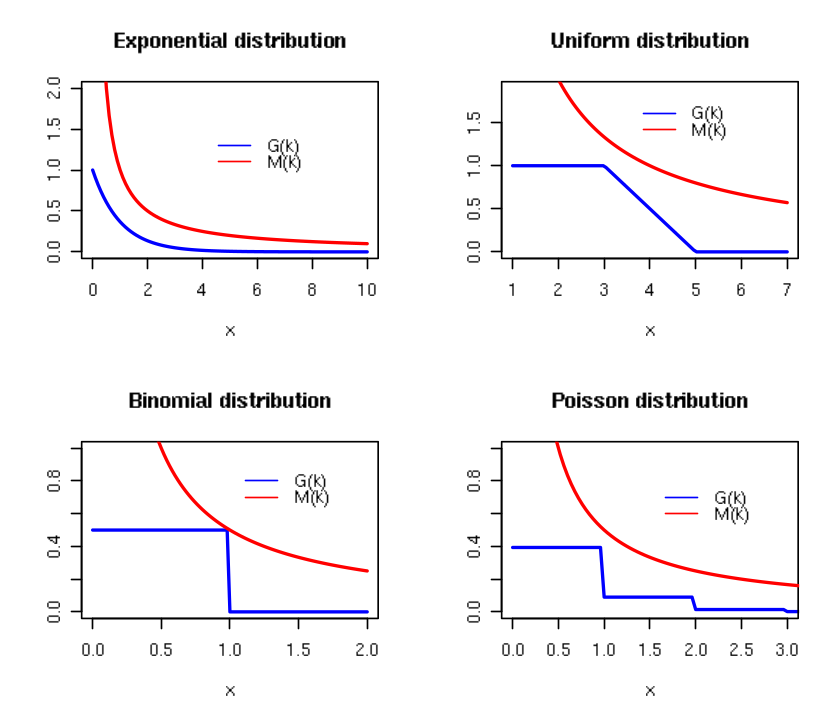

In [4]:
#I will use G and M as prefixes for the 1-cumulative function and for the Markov's upper limit
p_area<-matrix(c(1,2, 3, 4),nrow=2, ncol=2, byrow=TRUE)
layout(p_area)


#EXPONENTIAL
Gexp <- function(k){           
    1-pexp(k,1)
}

Mexp <- function(k){
    return (1/(k))
}

curve( 
     Gexp(x), from=0, to=10, 
     type="l",
     col="blue",
     ylim=c(0,2),
     main="Exponential distribution",
     ylab=" ",
     lwd=2
     )
curve( 
     Mexp(x), from=0, to=10, 
     type="l",
     col="red",
     ylab=" ",
     lwd=2,
    add=TRUE
     )
legend(4, 1.5, legend=c("G(k)", "M(k)"),bg="transparent",
       col=c("blue", "red"), lty=1:1, cex=1,box.lwd=0)




#UNIFORM
Gunif <- function(k){           
    1-punif(k,min=3, max=5)
}

Munif <- function(k){
    return ((5+3)/(2*k))
}

curve( 
     Gunif(x), from=1, to=7, 
     type="l",
     ylim=c(0,1.9),
     col="blue",
     main="Uniform distribution",
     ylab=" ",
     lwd=2
     )
curve( 
     Munif(x), from=1, to=7, 
     type="l",
     col="red",
     ylab=" ",
     lwd=2,
    add=TRUE
     )
legend(3.5, 1.8, legend=c("G(k)", "M(k)"), bg="transparent",
       col=c("blue", "red"), lty=1:1, cex=1,box.lwd=0)


#BINOMIAL
N=1
p=0.5
Gbinom <- function(k){           
    1-pbinom(k,size=N, p=p)
}

Mbinom <- function(k){
    return (N*p/k)
}

curve( 
     Gbinom(x), from=0, to=2, 
     type="l",
     ylim=c(0,1.),
     col="blue",
     main="Binomial distribution",
     ylab=" ",
     lwd=2,

     )
curve( 
     Mbinom(x), from=0, to=2, 
     type="l",
     col="red",
     ylab=" ",
     lwd=2,
    add=TRUE
     )

legend(1., 0.9, legend=c("G(k)", "M(k)"), bg="transparent",
       col=c("blue", "red"),lty=1:1, cex=1,box.lwd=0)

#POISSON
lambda=1/2
Gpois <- function(k){           
    1-ppois(k,lambda=lambda)
}

Mpois <- function(k){
    return (lambda/k)
}

curve( 
     Gpois(x), from=0, to=4, 
     type="l",
     xlim=c(0,3),
     ylim=c(0,1.),
     col="blue",
     main="Poisson distribution",
     ylab=" ",
     lwd=2
     )
curve( 
     Mpois(x), from=0, to=4, 
     type="l",
     col="red",
     ylab=" ",
     lwd=2,
    add=TRUE
     )
legend(1.5, .8, legend=c("G(k)", "M(k)"), bg="transparent",
       col=c("blue", "red"), lty=1:1, cex=1,box.lwd=0)
#?legend

## Exercise 3 - Chebyshev’s inequality
Chebyshev’s inequality tell us that 
$$P( X − \mu \geq k\sigma) \leq \frac{1}{k^2}$$
which can also be written as
$$ P( X − µ < kσ) \geq 1 −\frac{1}{k^2}$$
Use R to show, with a plot, that Chebyshev’s inequality is is an upper bound to the following distributions:

a) a normal distribution, $N\left(\mu = 3, \sigma = 5\right)$

b) an exponential distribution, $Exp\left(\lambda = 1\right)$

c) a uniform distribution $U \left(1-\sqrt{2}, 1+\sqrt{2}\right)$

d) a Poisson, Pois($\lambda = \frac{1}{3}$), distribution function

### Solution
$P\left( X − \mu \geq k\sigma \right)$ is equivalent to $P\left( X \geq  \mu+k\sigma\right) =1-P\left( X \leq  \mu+k\sigma\right)$
We will plot $1-P\left( X \leq  \mu+k\sigma\right)$ and we will verify that it is smaller than $\frac{1}{k^2} \,\,\forall k > 0$

[1] 0.7165313

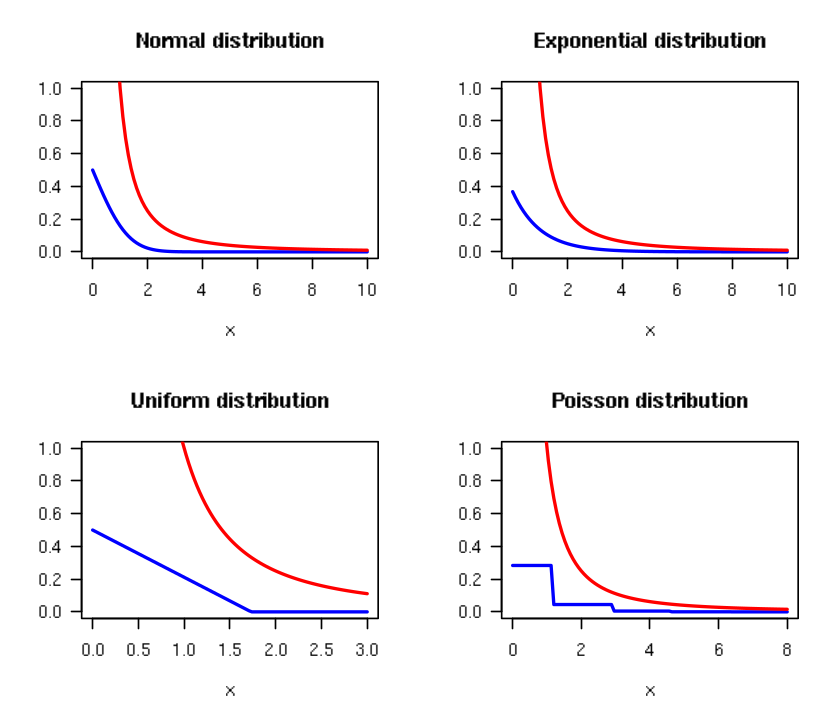

In [5]:
p_area<-matrix(c(1,2, 3, 4),nrow=2, ncol=2, byrow=TRUE)
layout(p_area)

#NORMAL DISTRIBUION
mean = 3
sigma= 5

Cnorm <- function(k){
    return (1-pnorm(mean+k*sigma,mean,sigma))
}

upperlimit <- function(k){
    return (1/k^2)
}

curve( 
     Cnorm(x), from=0, to=10, 
     type="l",
     col="blue",
     ylim=c(0,1),
     main="Normal distribution",
     las=1,
     ylab=" ",
     lwd=2
     )
curve( 
     upperlimit(x), from=0, to=10, 
     type="l",
     col="red",
     ylab=" ",
     lwd=2,
    add=TRUE
     )
legend(4, 1.5, legend=c("N(k)", "C(k)"),bg="transparent",
       col=c("blue", "red"), lty=1:1, cex=1,box.lwd=0)

#EXPONENTIAL DISTRIBUTION
lambda = 1
mean = 1/lambda
sigma = 1/lambda

Cexp <- function(k){
    return (1-pexp(mean+k*sigma,lambda))
}

curve( 
     Cexp(x), from=0, to=10, 
     type="l",
     col="blue",
     ylim=c(0,1),
     main="Exponential distribution",
     las=1,
     ylab=" ",
     lwd=2
     )
curve( 
     upperlimit(x), from=0, to=10, 
     type="l",
     col="red",
     ylab=" ",
     lwd=2,
    add=TRUE
     )
legend(4, 1.5, legend=c("N(k)", "C(k)"),bg="transparent",
       col=c("blue", "red"), lty=1:1, cex=1,box.lwd=0)


#UNIFORM DISTRIBUTION
a = 1 - sqrt(2)
b = 1 + sqrt(2)
mean = (a+b)/2
sigma = (b-a)/sqrt(12)

Cunif <- function(k){
    return (1-punif(mean+k*sigma, min = a, max = b))
}


curve( 
     Cunif(x), from=0, to=3, 
     type="l",
     col="blue",
     xlim=c(0,3),
     las=1,
     ylim=c(0,1),
     main="Uniform distribution",
     ylab=" ",
     lwd=2
     )
curve( 
     upperlimit(x), from=0, to=3, 
     type="l",
     col="red",
     ylab=" ",
     lwd=2,
    add=TRUE
     )
legend(4, 1.5, legend=c("N(k)", "C(k)"),bg="transparent",
       col=c("blue", "red"), lty=1:1, cex=1,box.lwd=0)



#Poisson DISTRIBUTION
lambda = 1/3
mean = lambda
sigma = sqrt(lambda)

Cpois <- function(k){
    return (1-ppois(mean+k*sigma,mean))
}


curve( 
     Cpois(x), from=0, to=8,
     las=1,
     type="l",
     col="blue",
     xlim=c(0,8),
     ylim=c(0,1),
     main="Poisson distribution",
     ylab=" ",
     lwd=2
     )
curve( 
     upperlimit(x), from=0, to=8, 
     type="l",
     col="red",
     ylab=" ",
     lwd=2,
    add=TRUE
     )
legend(4, 1.5, legend=c("N(k)", "C(k)"),bg="transparent",
       col=c("blue", "red"), lty=1:1, cex=1,box.lwd=0)
ppois(1/3,1/3)

## Exercise 4 - Six Boxes Toy Model : inference
The six boxes toy model is described in reference [1].
Labeling the boxes as follows:
$$H0\hspace{4 cm} H1\hspace{4 cm}H2\hspace{4 cm}H3\hspace{4 cm}H4\hspace{4 cm}H5$$
$$●●●●●  \hspace{2 cm}      ●●●●◌   \hspace{2 cm}   ●●●◌◌    \hspace{2 cm}    ●●◌◌◌   \hspace{2 cm}     ●◌◌◌◌  \hspace{2 cm}   ◌◌◌◌◌$$

Write a program in R that:
1) allows the user to insert the color of a randomly extracted box and

3) prints on the standard output the probability of selecting each box

4) plots the probability for each box as a function of the extraction step

In [6]:
options(digits=2)
H <- data.frame(t(rep(1/6,6)))
names(H) <- c("H0", "H1", "H2", "H3", "H4", "H5")
color  <- 0    #1 black, 0 white, 2 stop program
n_line <- 1    #n_line of the matrix, in order to print only the last line


while (color !=2){
    print(H[n_line,])                 #print the previous
    flush.console() 

    color <- readline(prompt="\nBlack (1), White(0), exit (2): ")
    if (color==2) {break}
    if (color==0){
        for (j in c(1:6)){
            H[n_line+1,j] <-(j-1)/5*H[n_line,j]
            }
        }
    if (color==1){
        for (j in c(1:6)){
            H[n_line+1,j] <-(6-j)/5*H[n_line,j]
            }
        }

n_line <- n_line +1
H[n_line,] <- H[n_line,]/sum(H[n_line,])
}


    H0   H1   H2   H3   H4   H5
1 0.17 0.17 0.17 0.17 0.17 0.17

Black (1), White(0), exit (2): 1
    H0   H1  H2   H3    H4 H5
2 0.33 0.27 0.2 0.13 0.067  0

Black (1), White(0), exit (2): 1
    H0   H1   H2    H3    H4 H5
3 0.45 0.29 0.16 0.073 0.018  0

Black (1), White(0), exit (2): 1
    H0   H1   H2    H3     H4 H5
4 0.56 0.28 0.12 0.036 0.0044  0

Black (1), White(0), exit (2): 1
    H0   H1    H2    H3    H4 H5
5 0.64 0.26 0.083 0.016 0.001  0

Black (1), White(0), exit (2): 1
    H0   H1    H2     H3      H4 H5
6 0.71 0.23 0.055 0.0072 0.00023  0

Black (1), White(0), exit (2): 1
    H0  H1    H2     H3      H4 H5
7 0.76 0.2 0.036 0.0031 4.9e-05  0

Black (1), White(0), exit (2): 1
    H0   H1    H2     H3    H4 H5
8 0.81 0.17 0.023 0.0013 1e-05  0

Black (1), White(0), exit (2): 1
    H0   H1    H2      H3      H4 H5
9 0.84 0.14 0.014 0.00055 2.2e-06  0

Black (1), White(0), exit (2): 1
     H0   H1     H2      H3      H4 H5
10 0.87 0.12 0.0088 0.00023 4.5e-07  0

Black (1), 

In [7]:
#summary
H

,H0,H1,H2,H3,H4,H5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.17,0.167,0.1667,1.7e-01,1.7e-01,0.17
2,0.33,0.267,0.2000,1.3e-01,6.7e-02,0.00
3,0.45,0.291,0.1636,7.3e-02,1.8e-02,0.00
4,0.56,0.284,0.1200,3.6e-02,4.4e-03,0.00
5,0.64,0.261,0.0827,1.6e-02,1.0e-03,0.00
6,0.71,0.231,0.0549,7.2e-03,2.3e-04,0.00
7,0.76,0.200,0.0355,3.1e-03,4.9e-05,0.00
8,0.81,0.169,0.0226,1.3e-03,1.0e-05,0.00
9,0.84,0.142,0.0142,5.5e-04,2.2e-06,0.00


3) plots the probability for each box as a function of the extraction step

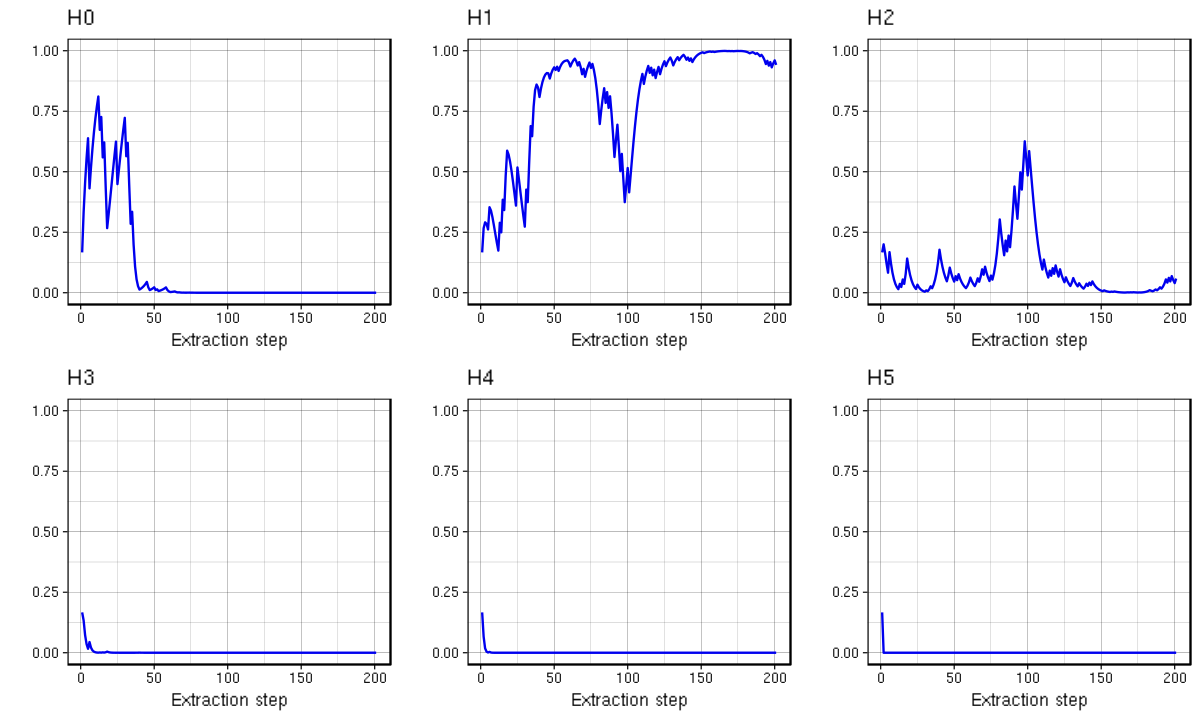

In [15]:
options(repr.plot.width=10, repr.plot.height=6) 
library(ggplot2)


p0 <- ggplot() +aes (x=as.numeric(rownames(H)), y=H['H0']$H0, group=1)+ geom_line(size=0.5, col="blue2") +
                        labs(title = "H0",
                        x = "Extraction step",
                        y = " ")+
                        ylim(0,1)+
                        theme_linedraw()+                    
                        theme(text = element_text(size=10),
                        )
p1 <-ggplot() +aes (x=as.numeric(rownames(H)), y=H['H1']$H1, group=1)+ geom_line(size=0.5, col="blue2") +                            #linking with lines
                    labs(title = "H1",
                        x = "Extraction step",
                        y = " ")+
                        ylim(0,1)+
                        theme_linedraw()+                    
                        theme(text = element_text(size=10))
p2 <-ggplot() +aes (x=as.numeric(rownames(H)), y=H['H2']$H2, group=1)+ geom_line(size=0.5, col="blue2") +                            #linking with lines
                    labs(title = "H2",
                        x = "Extraction step",
                        y = " ")+
                        ylim(0,1)+
                        theme_linedraw()+                    
                        theme(text = element_text(size=10))
p3 <- ggplot() +aes (x=as.numeric(rownames(H)), y=H['H3']$H3, group=1)+ geom_line(size=0.5, col="blue2") +                            #linking with lines
                    labs(title = "H3",
                        x = "Extraction step",
                        y = " ")+
                        ylim(0,1)+
                        theme_linedraw()+                    
                        theme(text = element_text(size=10))
p4 <-ggplot() +aes (x=as.numeric(rownames(H)), y=H['H4']$H4, group=1)+ geom_line(size=0.5, col="blue2") +                            #linking with lines
                    labs(title = "H4",
                        x = "Extraction step",
                        y = " ")+
                        ylim(0,1)+
                        theme_linedraw()+                    
                        theme(text = element_text(size=10))
p5 <-ggplot() +aes (x=as.numeric(rownames(H)), y=H['H5']$H5, group=1)+ geom_line(size=0.5, col="blue2") +                            #linking with lines
                    labs(title = "H5",
                        x = "Extraction step",
                        y = " ")+
                        ylim(0,1)+
                        theme_linedraw()+
                        theme(text = element_text(size=10))
library(gridExtra)
library(grid)
grid.arrange(
  p0,  p1,  p2,
  p3,  p4,  p5,
  nrow = 2
  )


## Exercise 5 - Six Boxes Toy Model : simulation
Consider again the six boxes toy model of the previous exercise and write a simulation program that:

1) selects a random box

2) makes random sampling from the box

3) prints on the standard output the probability of selecting each box

4) plots the probability for each box as a function of the number of trial

#### Selection of Random box

In [9]:
#selection of random box

set.seed(124123)
j <- runif(1,min=0, max=6)
j <- floor(j)
           
#cat("box number:\t\t H",j,"\n")  from 0 to 5

#### Random sampling from the box
We extract numbers c in 0-1 and according to the box (that we don't know but the computer does), we see if it is white or black:

In [10]:
#random sampling
set.seed(123123)
c <- runif(2*10^2, min=0,  max=1)

#number of white and black extractions
white <- length(c[c<j/5])
black <- length(c)-white
cat("White extracted are :\t",white,"\n")
cat("Black extracted are :\t",black)

White extracted are :	 79 
Black extracted are :	 121

#### Print the probability of selecting each box
We will briefly repeat the algorithm used earlier

In [11]:
H <- data.frame(t(rep(1/6,6)))
n_line <- 1
for (color in c){                         #for each possible box
    if (color < j/5){                     #if white
        for (q in c(1:6)){
            H[n_line+1,q] <- q/6*H[n_line,q]
            }
        }
    if (color >= j/5){                   #if black
        for (q in c(1:6)){
            H[n_line+1,q] <-(6-q)/6*H[n_line,q]
            }
        }

n_line <- n_line +1
H[n_line,] <- H[n_line,]/sum(H[n_line,])
}


In [12]:
colnames(H) <- c("H0","H1","H2","H3","H4","H5")
H[n_line,]

,H0,H1,H2,H3,H4,H5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
201,8.3e-13,0.94,0.059,2.1e-13,3.6e-42,0


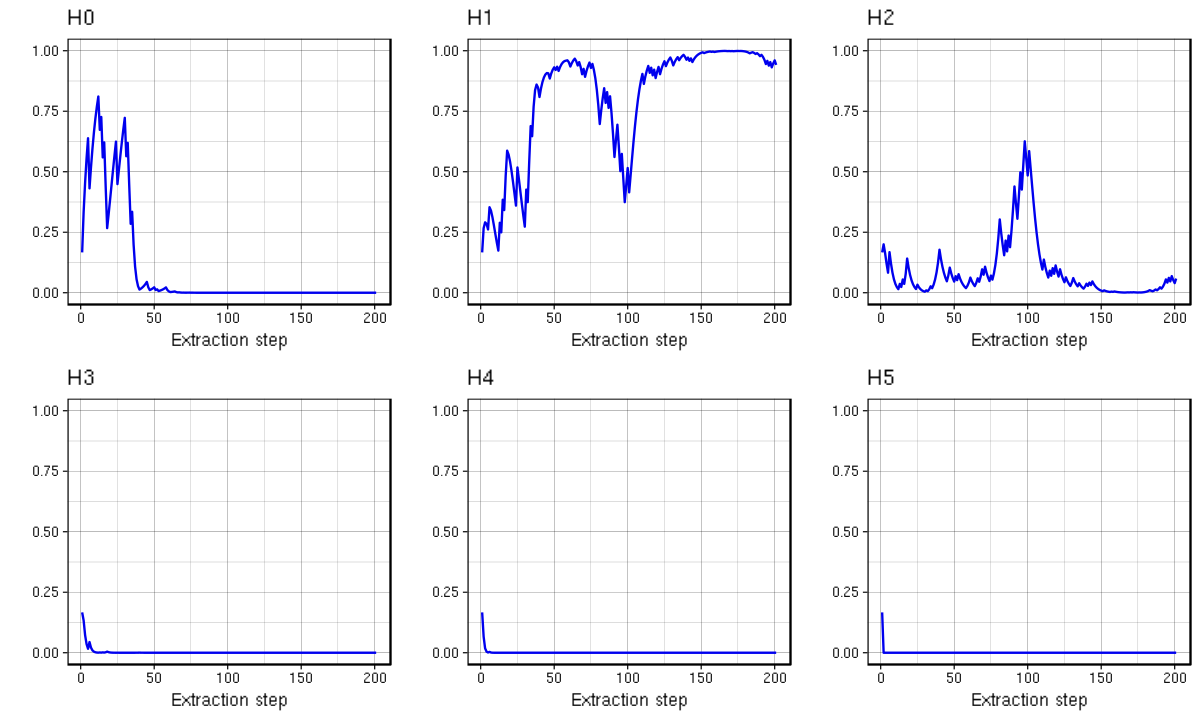

In [13]:
options(repr.plot.width=10, repr.plot.height=6) 
library(ggplot2)


p0 <- ggplot() +aes (x=as.numeric(rownames(H)), y=H['H0']$H0, group=1)+ geom_line(size=0.5, col="blue2") +
                        labs(title = "H0",
                        x = "Extraction step",
                        y = " ")+
                        ylim(0,1)+
                        theme_linedraw()+                    
                        theme(text = element_text(size=10),
                        )
p1 <-ggplot() +aes (x=as.numeric(rownames(H)), y=H['H1']$H1, group=1)+ geom_line(size=0.5, col="blue2") +                            #linking with lines
                    labs(title = "H1",
                        x = "Extraction step",
                        y = " ")+
                        ylim(0,1)+
                        theme_linedraw()+                    
                        theme(text = element_text(size=10))
p2 <-ggplot() +aes (x=as.numeric(rownames(H)), y=H['H2']$H2, group=1)+ geom_line(size=0.5, col="blue2") +                            #linking with lines
                    labs(title = "H2",
                        x = "Extraction step",
                        y = " ")+
                        ylim(0,1)+
                        theme_linedraw()+                    
                        theme(text = element_text(size=10))
p3 <- ggplot() +aes (x=as.numeric(rownames(H)), y=H['H3']$H3, group=1)+ geom_line(size=0.5, col="blue2") +                            #linking with lines
                    labs(title = "H3",
                        x = "Extraction step",
                        y = " ")+
                        ylim(0,1)+
                        theme_linedraw()+                    
                        theme(text = element_text(size=10))
p4 <-ggplot() +aes (x=as.numeric(rownames(H)), y=H['H4']$H4, group=1)+ geom_line(size=0.5, col="blue2") +                            #linking with lines
                    labs(title = "H4",
                        x = "Extraction step",
                        y = " ")+
                        ylim(0,1)+
                        theme_linedraw()+                    
                        theme(text = element_text(size=10))
p5 <-ggplot() +aes (x=as.numeric(rownames(H)), y=H['H5']$H5, group=1)+ geom_line(size=0.5, col="blue2") +                            #linking with lines
                    labs(title = "H5",
                        x = "Extraction step",
                        y = " ")+
                        ylim(0,1)+
                        theme_linedraw()+
                        theme(text = element_text(size=10))
library(gridExtra)
library(grid)
grid.arrange(
  p0,  p1,  p2,
  p3,  p4,  p5,
  nrow = 2
  )

We do see that the box previously extracted is most likely to be H1

In [14]:
options(digits=4)
cat("Probability that the extracted box was H1 is:\t",H[n_line,2])

Probability that the extracted box was H1 is:	 0.9415